In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn
# Installed required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
import logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(message)s')
logger = logging.getLogger()
logger.info("Logging is now working correctly.")

  Loading the Data

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
'/content/drive/MyDrive/'


'/content/drive/MyDrive/'

In [7]:
train = pd.read_csv('/content/drive/MyDrive/train.csv')
store = pd.read_csv('/content/drive/MyDrive/store.csv')
test = pd.read_csv('/content/drive/MyDrive/test.csv')


/tmp/ipython-input-7-2434316200.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('/content/drive/MyDrive/train.csv')


In [8]:
# Checking Basic info
print("Train:")
print(train.info())
print("\nStore:")
print(store.info())
print("\nTest:")
print(test.info())

Train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
None

Store:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null  

In [9]:
display(train.head())
display(store.head())
display(test.head())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [10]:
display(train.tail())
display(store.tail())
display(test.tail())

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0
41087,41088,1115,6,2015-08-01,1.0,0,0,1


In [11]:
#checking each file shape
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("store shape:", store.shape)

Train shape: (1017209, 9)
Test shape: (41088, 8)
store shape: (1115, 10)


In [12]:
#Checking Statistics analysis
print("\n Train Descriptive statistics:")
print(train.describe())
print("\n Test Descriptive statistics:")
print(test.describe())
print("\n Store Descriptive statistics:")
print(store.describe())


 Train Descriptive statistics:
              Store     DayOfWeek         Sales     Customers          Open  \
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   
mean   5.584297e+02  3.998341e+00  5.773819e+03  6.331459e+02  8.301067e-01   
std    3.219087e+02  1.997391e+00  3.849926e+03  4.644117e+02  3.755392e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.800000e+02  2.000000e+00  3.727000e+03  4.050000e+02  1.000000e+00   
50%    5.580000e+02  4.000000e+00  5.744000e+03  6.090000e+02  1.000000e+00   
75%    8.380000e+02  6.000000e+00  7.856000e+03  8.370000e+02  1.000000e+00   
max    1.115000e+03  7.000000e+00  4.155100e+04  7.388000e+03  1.000000e+00   

              Promo  SchoolHoliday  
count  1.017209e+06   1.017209e+06  
mean   3.815145e-01   1.786467e-01  
std    4.857586e-01   3.830564e-01  
min    0.000000e+00   0.000000e+00  
25%    0.000000e+00   0.000000e+00  
50%    0.000000e+00   0.000000e+00

In [13]:
#Checking DataTypes
print("\n Train Data Types:")
print(train.dtypes)
print("\n Test Data Types:")
print(test.dtypes)
print("\n Store Data Types:")
print(store.dtypes)


 Train Data Types:
Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

 Test Data Types:
Id                 int64
Store              int64
DayOfWeek          int64
Date              object
Open             float64
Promo              int64
StateHoliday      object
SchoolHoliday      int64
dtype: object

 Store Data Types:
Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object


In [14]:
#it displaying all the column names
print("\n Train Column Names:")
print(train.columns)
print("\n Test Column Names:")
print(test.columns)
print("\n Store Column Names:")
print(store.columns)


 Train Column Names:
Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

 Test Column Names:
Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')

 Store Column Names:
Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')


In [15]:
categorical_cols = train.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"{col} - Unique values: {train[col].nunique()}")
    print(train[col].value_counts(), "\n")

Date - Unique values: 942
Date
2013-01-02    1115
2015-07-31    1115
2015-07-30    1115
2015-07-29    1115
2015-07-28    1115
              ... 
2014-12-28     935
2014-12-26     935
2014-12-25     935
2014-12-24     935
2014-12-23     935
Name: count, Length: 942, dtype: int64 

StateHoliday - Unique values: 5
StateHoliday
0    855087
0    131072
a     20260
b      6690
c      4100
Name: count, dtype: int64 



In [16]:
# Merge store info into train and test
train = pd.merge(train, store, on='Store', how='left')
test = pd.merge(test, store, on='Store', how='left')

In [17]:
#Convert dates
train['Date'] = pd.to_datetime(train['Date']); test['Date'] = pd.to_datetime(test['Date'])


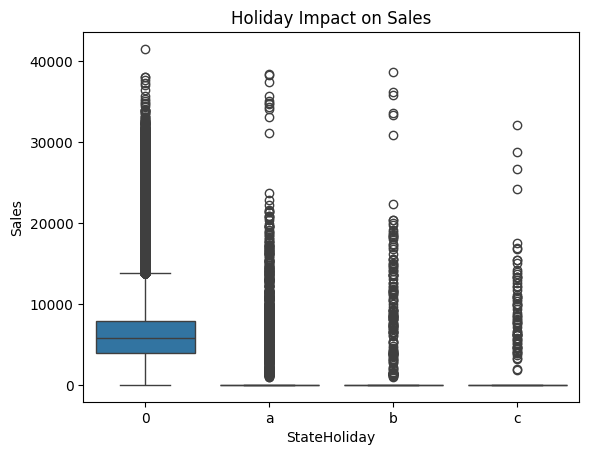

In [18]:
# StateHoliday effect
sns.boxplot(x='StateHoliday', y='Sales', data=train)
plt.title("Holiday Impact on Sales")
plt.show()

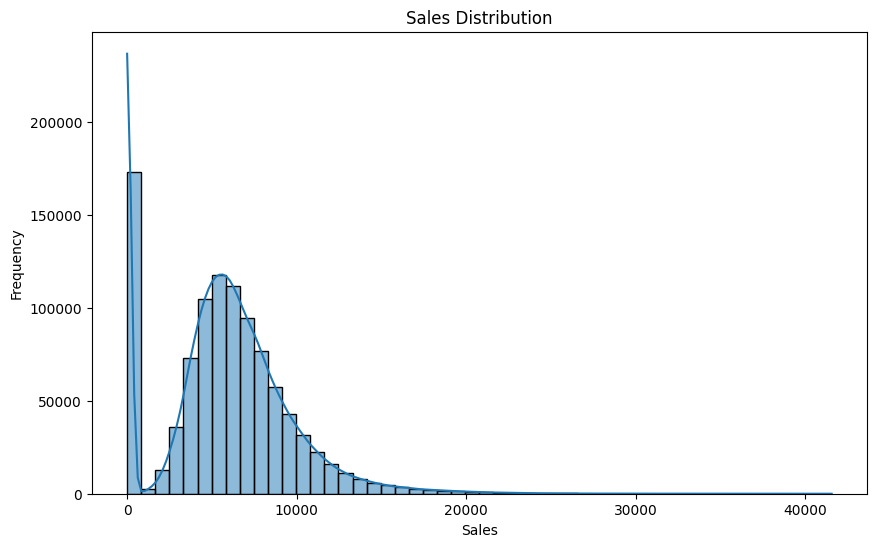

In [19]:
# Sales distribution
plt.figure(figsize=(10, 6))
sns.histplot(train['Sales'], bins=50, kde=True)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

In [20]:
#Above mentioned Histogram bar shows how frequently different sales values occur.Curve helps to identify the overall shape of the distribution.
#sales data is right skewed, some of stores are likely days when stores were open but didn't perform well.
#many days with low or moderate sales, and fewer days with very high sales.

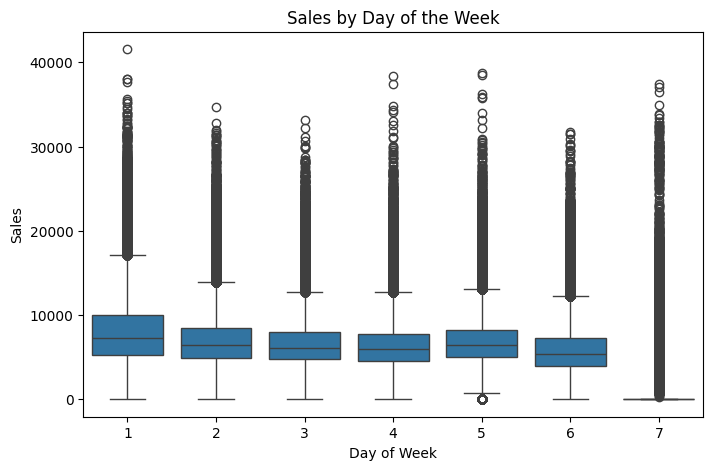

In [21]:
#Sales by DayOfWeek
plt.figure(figsize=(8, 5))
sns.boxplot(data=train, x='DayOfWeek', y='Sales')
plt.title("Sales by Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Sales")
plt.show()

In [22]:
#The boxplot showing a clear comparison of sales values for each day of the week. The median represents the central tendency of sales.
#Monday showed the highest median sales across most stores, indicating peak demand. Conversely, Sundays had the lowest activity, likely due to partial store closures.
#Several outliers, particularly on Wednesdays and Saturdays, hint at localized promotional success

In [23]:
# Date Features
train['Date'] = pd.to_datetime(train['Date'])
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['Week'] = train['Date'].dt.isocalendar().week
train['Day'] = train['Date'].dt.day
train['DayOfYear'] = train['Date'].dt.dayofyear

In [24]:
# Calculate average sales per month
monthly_sales = train.groupby('Month')['Sales'].mean()

/tmp/ipython-input-25-4273947435.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette="Blues_d")


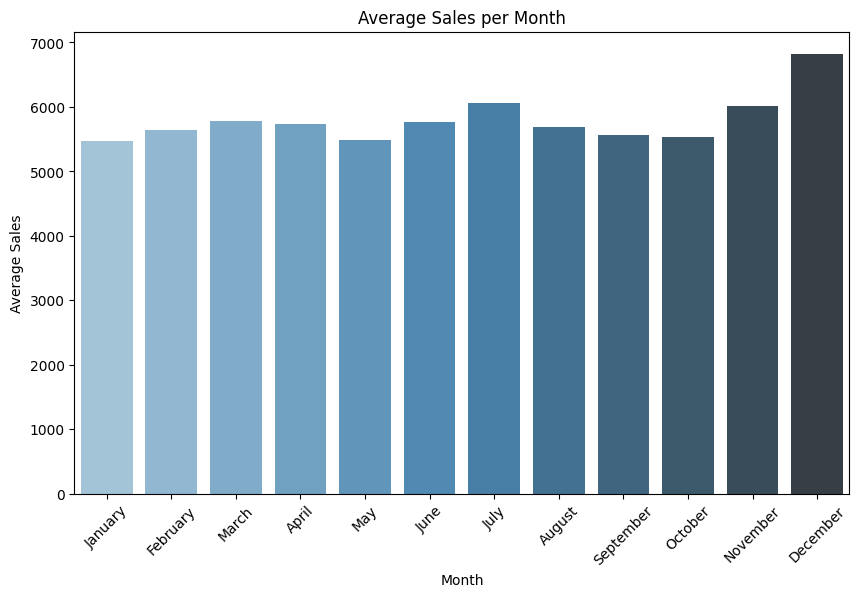

In [25]:
# Monthly average sales
import calendar
plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette="Blues_d")
plt.title("Average Sales per Month")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.xticks(ticks=range(12), labels=calendar.month_name[1:], rotation=45)
plt.show()

In [26]:
#Above Bar chart monthly average sales reveals clear seasonal trends in retail activity.
#December consistently outperforms other months, likely due to holiday shopping and year-end promotions,
#while January shows the weakest performance, reflecting reduced consumer spending post-holidays.

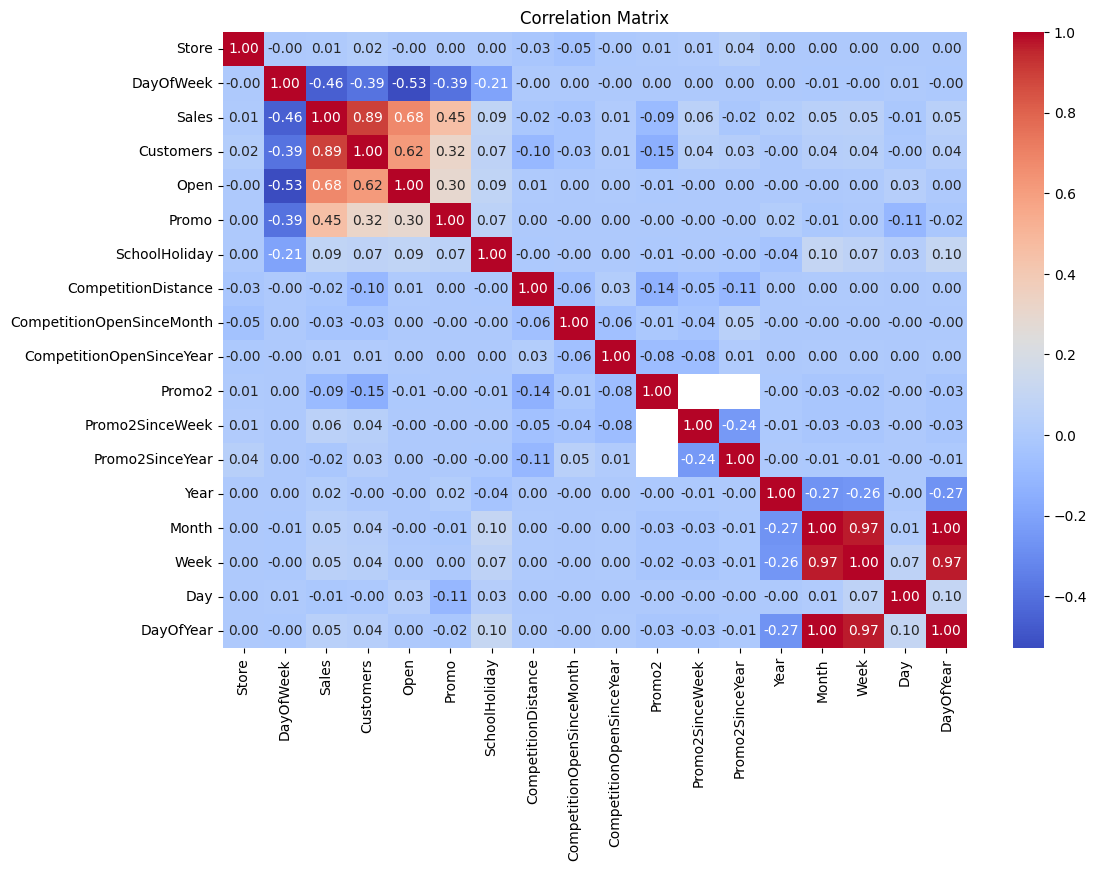

In [27]:
# Visualizing Correlation Matrix
plt.figure(figsize=(12, 8))
corr = train.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

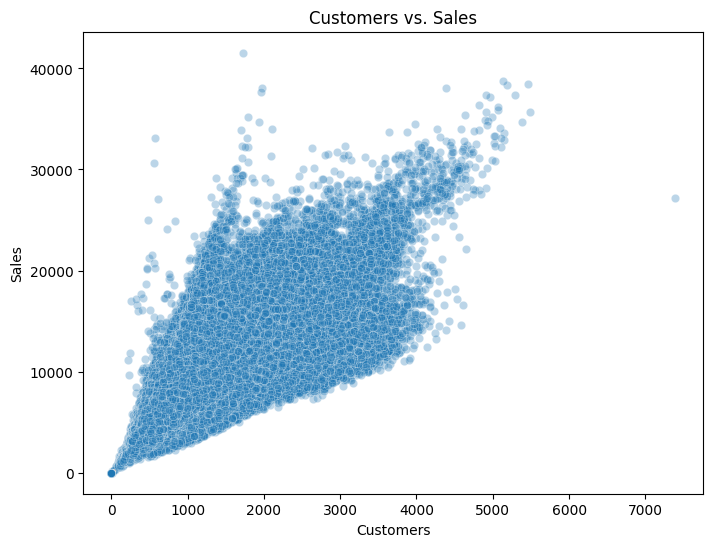

In [28]:
#Visualizing Customers vs Sales
plt.figure(figsize=(8, 6))
sns.scatterplot(data=train, x='Customers', y='Sales', alpha=0.3)
plt.title("Customers vs. Sales")
plt.show()

In [29]:
#The scatter plot of customers versus sales reveals a strong positive correlation between store traffic and revenue generation
#This suggests that customer count is a key driver of sales and should be considered a primary input in any business strategy.

In [30]:
#Cleaning & Feature Engineering

In [31]:
#Remove closed stores from training (sales = 0)
train = train[train['Open'] != 0]; train = train[train['Sales'] > 0]

In [32]:
train.shape #checking shape after merging and removing closed stores

(844338, 23)

In [33]:
print(train.columns)#Checking column names

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Week', 'Day',
       'DayOfYear'],
      dtype='object')


In [34]:
#Handling Missing Values and Outliers

In [35]:
#Filled numeric columns with median
num_cols = train.select_dtypes(include=[np.number]).columns
train[num_cols] = train[num_cols].fillna(train[num_cols].median())

In [36]:
#Filled categorical columns with mode
cat_cols = train.select_dtypes(include=['object']).columns
train[cat_cols] = train[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))

In [37]:
#Checking if any missing values remain
print("Remaining missing values per column:")
print(train.isnull().sum()[train.isnull().sum() > 0])

Remaining missing values per column:
Series([], dtype: int64)


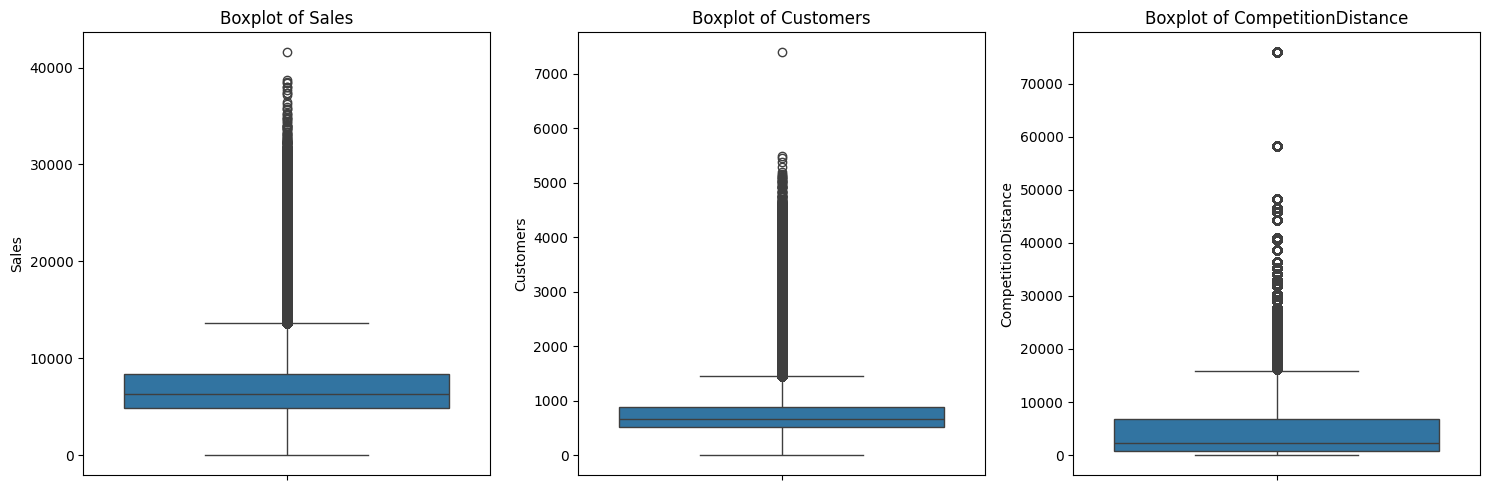

In [38]:
#Visualizing Outliers Using Boxplots
num_cols = ['Sales', 'Customers', 'CompetitionDistance'] # It Select numeric columns only
# Visualizing boxplots for each column
plt.figure(figsize=(15, 5))
for i, col in enumerate(num_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=train, y=col)
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [39]:
#Detecting Outliers Using IQR Method
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

In [40]:
# Show rows before removal
print(f"Original shape: {train.shape}")

Original shape: (844338, 23)


In [41]:
# Remove outliers from selected numeric columns
for col in num_cols:
    train = remove_outliers(train, col)

In [42]:
# Show rows after removal
print(f"After outlier removal: {train.shape}")

After outlier removal: (715912, 23)


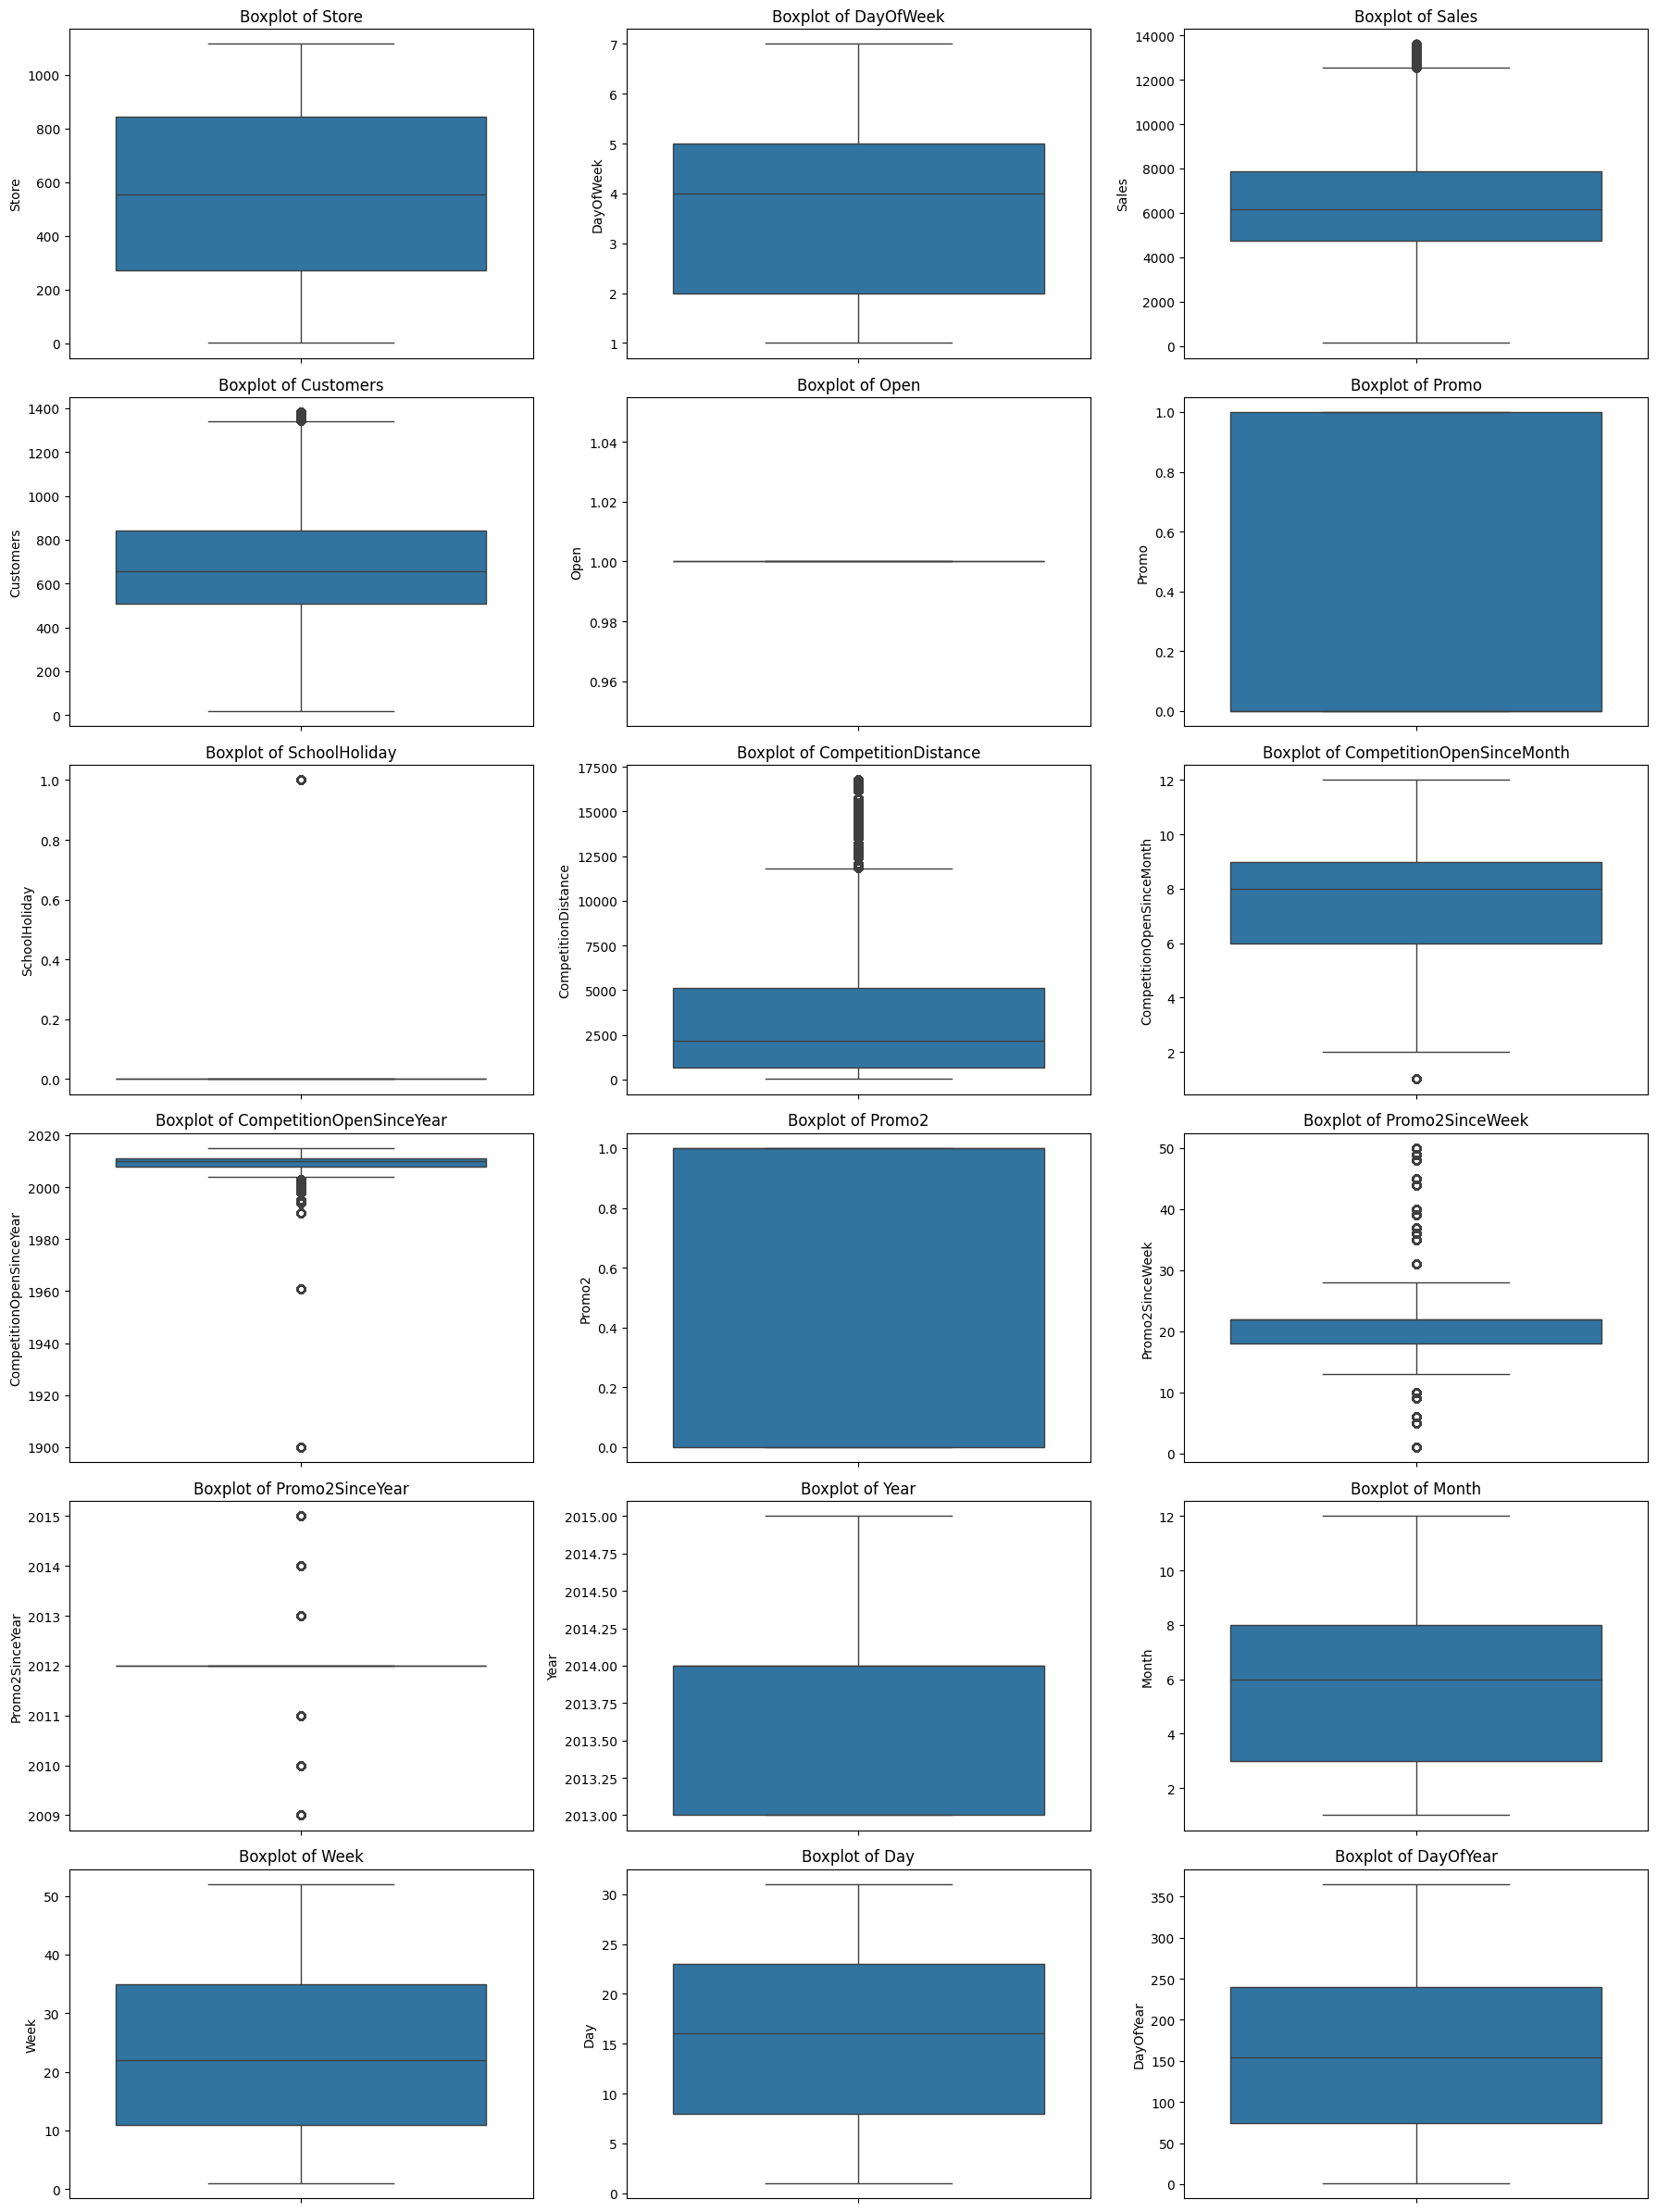

In [43]:
# Checking all numeric columns
numeric_cols = train.select_dtypes(include=['number']).columns

# Plot boxplots in grid format for all numeric columns
num_plots = len(numeric_cols)
cols = 3  # number of plots per row
rows = -(-num_plots // cols)  # ceiling division for rows

plt.figure(figsize=(6 * cols, 4 * rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(y=train[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

# Task 1 - Exploration of customer purchasing behaviour

**Promo Distribution in Train vs Test**


In [44]:
train_promo_pct = train['Promo'].mean()
test_promo_pct = test['Promo'].mean()
logging.info(f"Promo Rate - Train: {train_promo_pct:.2%}, Test: {test_promo_pct:.2%}")

/tmp/ipython-input-45-2342514730.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Train', 'Test'], y=[train_promo_pct, test_promo_pct], palette='Set2')


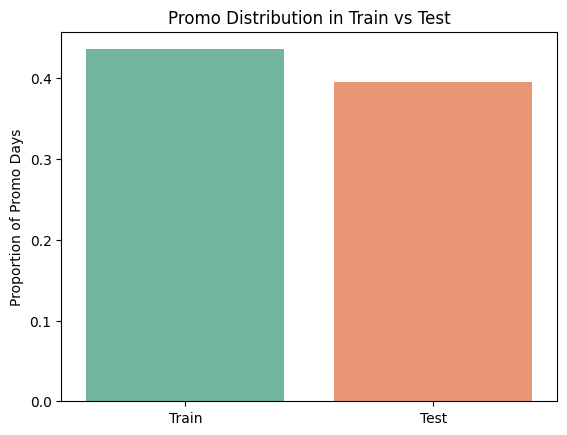

In [45]:
# Visualization
sns.barplot(x=['Train', 'Test'], y=[train_promo_pct, test_promo_pct], palette='Set2')
plt.title("Promo Distribution in Train vs Test")
plt.ylabel("Proportion of Promo Days")
plt.show()

1.Above bar plot shows how promotional days are distributed in both train and test datasets

2.the model is exposed to similar promo conditions during training and evaluation.

**Sales Before, During, and After Holidays**

/tmp/ipython-input-46-2442267765.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(


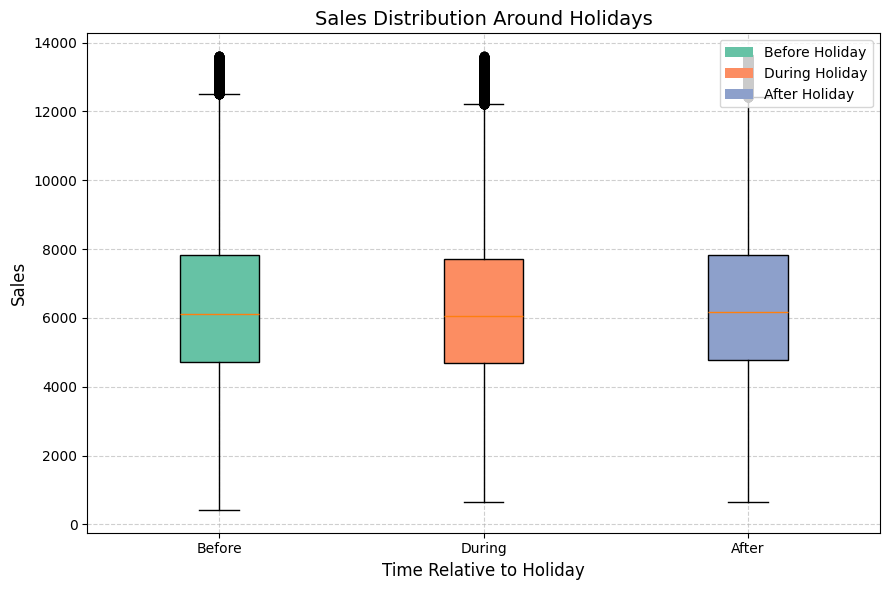

In [46]:
from matplotlib.patches import Patch

logging.basicConfig(level=logging.INFO)
holidays = pd.to_datetime(train[train['StateHoliday'] != '0']['Date'].unique())

# Convert the 'Date' column to datetime if not already
train['Date'] = pd.to_datetime(train['Date'])

# Filtering sales data for the day before, during, and after holidays
sales_before = train[train['Date'].isin(holidays - pd.Timedelta(days=1))]['Sales']
sales_during = train[train['Date'].isin(holidays)]['Sales']
sales_after = train[train['Date'].isin(holidays + pd.Timedelta(days=1))]['Sales']

# Log the average sales for each period
logging.info(f"Sales Before Holiday: {sales_before.mean():.1f}, During: {sales_during.mean():.1f}, After: {sales_after.mean():.1f}")
box_colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Visualizing the sales details
plt.figure(figsize=(9, 6))
box = plt.boxplot(
    [sales_before, sales_during, sales_after],
    patch_artist=True,
    labels=["Before", "During", "After"]
)

for patch, color in zip(box['boxes'], box_colors):
    patch.set_facecolor(color)

# Adding labels and title
plt.title("Sales Distribution Around Holidays", fontsize=14)
plt.ylabel("Sales", fontsize=12)
plt.xlabel("Time Relative to Holiday", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
legend_patches = [
    Patch(facecolor=box_colors[0], label='Before Holiday'),
    Patch(facecolor=box_colors[1], label='During Holiday'),
    Patch(facecolor=box_colors[2], label='After Holiday')
]
plt.legend(handles=legend_patches, loc='upper right')
plt.tight_layout()
plt.show()


 1.The boxplot reveals noticeable changes in sales around holidays it indicating that holidays significantly influence customer purchasing behavior.

 2.If mean sales are lower during holidays, it reflecting store closures or reduced footfall.

 3.The above visualization sales spike before or after holidays can help with inventory stocking, staffing decisions, and promotional planning.

**Seasonal Sales Trends (Christmas, Easter)**

In [47]:
train['Month'] = train['Date'].dt.month
monthly_sales = train.groupby('Month')['Sales'].mean().reset_index()

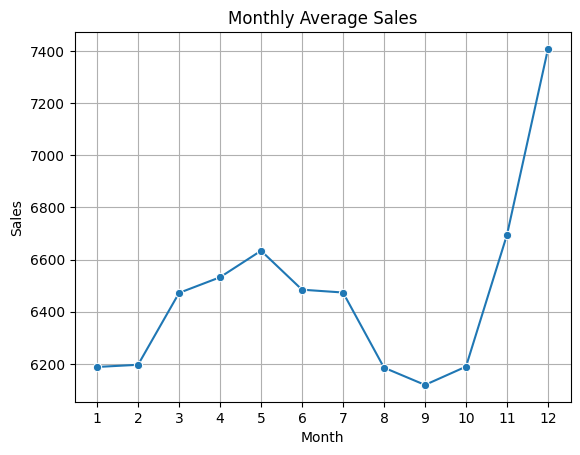

In [48]:
#Visualizing seaonal sales with lineplot
sns.lineplot(data=monthly_sales, x='Month', y='Sales', marker='o')
plt.title("Monthly Average Sales")
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

1. The Above line plot highlights which months see peaks or dips in sales,it indicating the presence of seasonality in customer purchasing behavior.

2. it showing high sales in December month and low sales in january month and in between june and july month has spike on sales.

**Sales vs. Customers Correlation**

In [49]:
correlation = train[['Sales', 'Customers']].corr().iloc[0,1]
logging.info(f"Correlation between Sales and Customers: {correlation:.2f}")

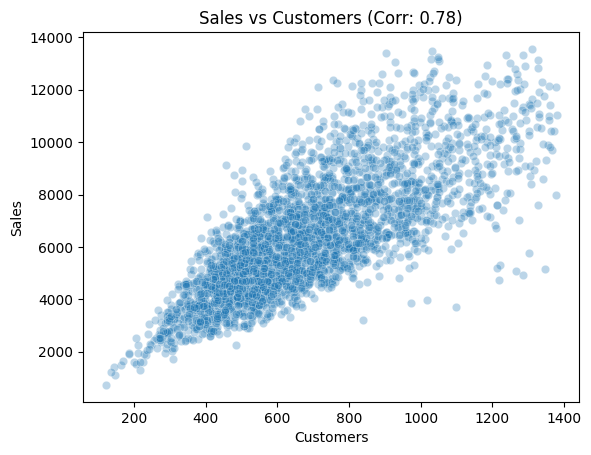

In [50]:
#Visualizing Customers vs Sales
sns.scatterplot(data=train.sample(3000), x='Customers', y='Sales', alpha=0.3)
plt.title(f"Sales vs Customers (Corr: {correlation:.2f})")
plt.show()

**Promo Impact on Sales and Customers**

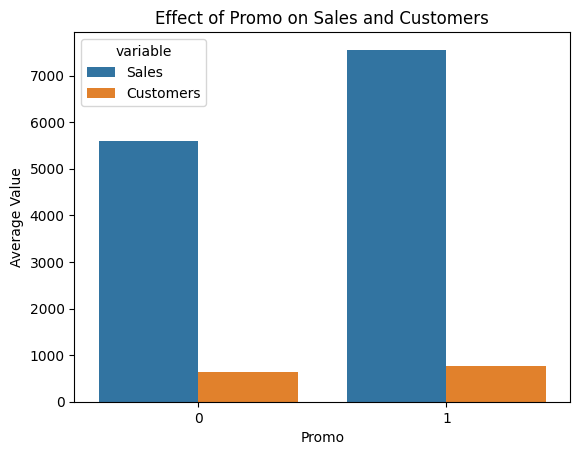

In [51]:
promo_agg = train.groupby('Promo')[['Sales', 'Customers']].mean().reset_index()

sns.barplot(data=promo_agg.melt(id_vars='Promo'), x='Promo', y='value', hue='variable')
plt.title("Effect of Promo on Sales and Customers")
plt.ylabel("Average Value")
plt.show()

logging.info(promo_agg)


1. The bar plot typically shows a higher average number of customers during promotional periods
2. Average sales are significantly higher when promotions are active, indicating that not only do more people shop during promos, but they also spend more.

**Best Stores for Promos**

In [52]:
# Computing sales gain from promotions:
store_promo_gain = train.groupby(['Store', 'Promo'])['Sales'].mean().unstack()
store_promo_gain['Gain'] = store_promo_gain[1] - store_promo_gain[0]
top_stores = store_promo_gain['Gain'].nlargest(10)

In [53]:
# Identify top 10 stores with the highest promotional sales gain
logging.info("Top 10 stores for promo deployment:\n" + str(top_stores))

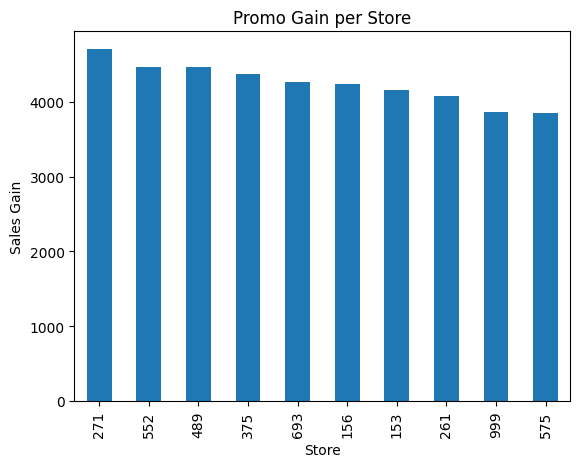

In [54]:
#Visualize the top-performing stores in terms of promo impact
top_stores.plot(kind='bar', title='Promo Gain per Store')
plt.ylabel('Sales Gain')
plt.show()

Not all stores benefit equally from promotions. The analysis shows that some of the stores has higher sales gains.

**Store Open Patterns & Weekend Sales**

In [55]:
train['DayOfWeek'] = train['Date'].dt.dayofweek# Extract day of the week from the date (0 = Monday, 6 = Sunday)
daily_open = train.groupby('DayOfWeek')['Open'].mean()# it Calculate average open rate for each day of the week
daily_sales = train.groupby('DayOfWeek')['Sales'].mean()

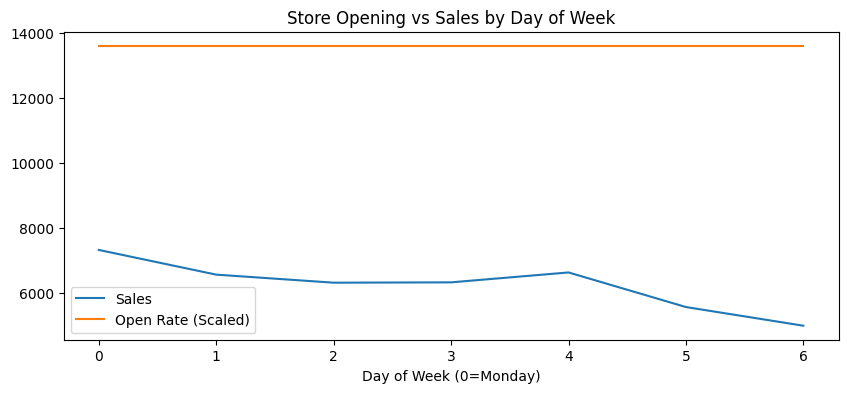

In [56]:
# Plotting sales and store open rate per weekday
plt.figure(figsize=(10,4))
sns.lineplot(x=daily_sales.index, y=daily_sales.values, label='Sales')
sns.lineplot(x=daily_open.index, y=daily_open.values * train['Sales'].max(), label='Open Rate (Scaled)')
plt.title("Store Opening vs Sales by Day of Week")
plt.xlabel("Day of Week (0=Monday)")
plt.show()

Above line plot showing average sales across the week, typically peaking on weekdays (e.g., Friday) and dipping during weekends, especially Sunday when many stores are closed.



**Assortment Type vs Sales**

/tmp/ipython-input-57-1738329198.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=train, x='Assortment', y='Sales', palette='Pastel1')


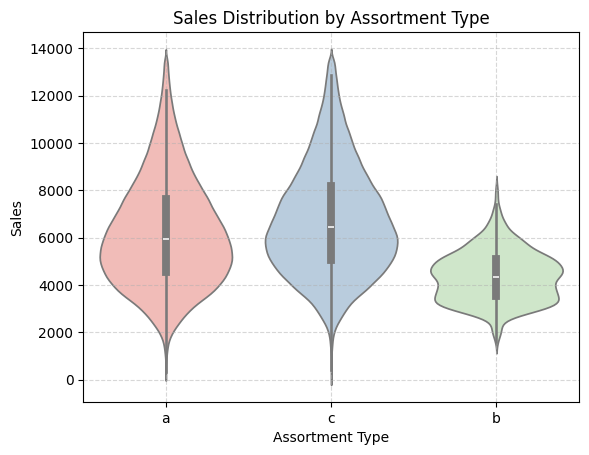

In [57]:
#plot to visualize the distribution of sales for each assortment type
sns.violinplot(data=train, x='Assortment', y='Sales', palette='Pastel1')
plt.title("Sales Distribution by Assortment Type")
plt.ylabel("Sales")
plt.xlabel("Assortment Type")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

1. The violin plot reveals not just average sales, but the full distribution shape for each assortment type, highlighting whether sales are skewed or symmetric.

2. The violin plot can show multiple peaks or heavy tails, suggesting potential outliers or multiple sales behavior modes within an assortment.

**Competition Distance Impact**

In [58]:
train.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Year', 'Month', 'Week', 'Day',
       'DayOfYear'],
      dtype='object')

In [59]:
# Drop rows where CompetitionDistance or Sales is missing
train_clean = train[['CompetitionDistance', 'Sales']].dropna()
train_clean['CompDistBin'] = pd.cut(train_clean['CompetitionDistance'], bins=10)

# Calculate average sales for each distance bin
comp_dist_avg = train_clean.groupby('CompDistBin', observed=True)['Sales'].mean().reset_index()
comp_dist_avg['DistanceMid'] = comp_dist_avg['CompDistBin'].apply(lambda x: x.mid)


/tmp/ipython-input-60-4082829695.py:11: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


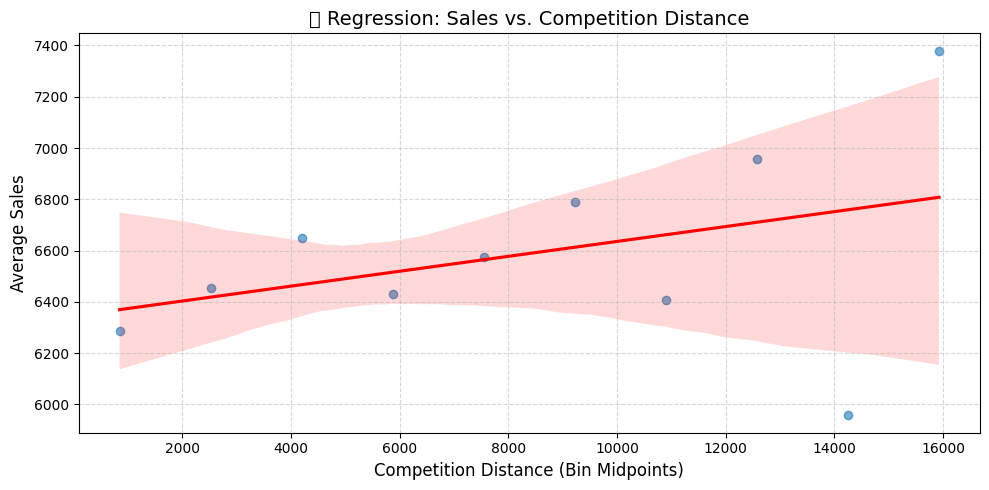

In [60]:
#plotting
plt.figure(figsize=(10, 5))

sns.regplot(data=comp_dist_avg, x='DistanceMid', y='Sales',
            scatter_kws={'alpha': 0.6}, line_kws={"color": "red"})

plt.title("📈 Regression: Sales vs. Competition Distance", fontsize=14)
plt.xlabel("Competition Distance (Bin Midpoints)", fontsize=12)
plt.ylabel("Average Sales", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



1. The plot shows a clear trend in average sales across different competition distance bins. This suggests that how close a store is to its competitors has a measurable impact on revenue.
2. If average sales are lower in bins with shorter distances, it implies that nearby competitors may pull customers away. Conversely, if closer bins show higher sales, it could indicate a dense, high-demand market.

**New Competitor Openings**

In [61]:
train.sort_values(by=['Store','Date'], inplace=True)
train['CompDistPrev'] = train.groupby('Store')['CompetitionDistance'].ffill().shift()

new_comp_open = train[(train['CompDistPrev'].isna()) & (train['CompetitionDistance'].notna())]
affected_stores = new_comp_open['Store'].nunique()
logging.info(f"Stores affected by new competitor opening: {affected_stores}")


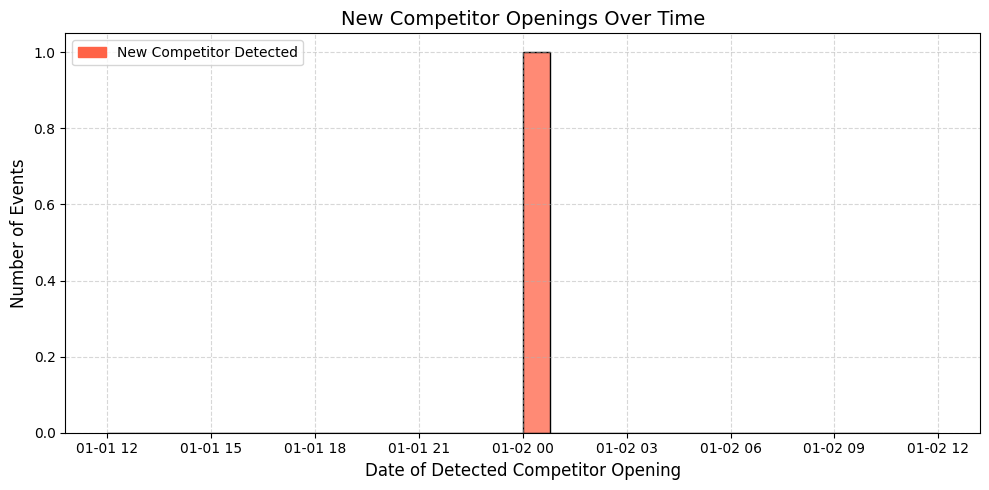

In [62]:
# Visualization: Histogram of how many new competitor events occurred over time
plt.figure(figsize=(10, 5))
sns.histplot(new_comp_open['Date'], bins=30, kde=False, color='tomato')
plt.title("New Competitor Openings Over Time", fontsize=14)
plt.xlabel("Date of Detected Competitor Opening", fontsize=12)
plt.ylabel("Number of Events", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
legend_patch = Patch(color='tomato', label='New Competitor Detected')
plt.legend(handles=[legend_patch], loc='upper left')

plt.tight_layout()
plt.show()


The histogram reveals clusters of competitor entries, showing periods of aggressive expansion or market saturation. This can help interpret sales dips in those periods.

In [63]:
# Generates EDA notebook for Rossmann project (Task 1)
from datetime import datetime
from nbformat import v4 as nbf

nb = nbf.new_notebook()
now = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

cells = []

cells.append(nbf.new_markdown_cell(f"# 🛒 Rossmann Sales Forecasting EDA Notebook\n*Generated: {now}*"))
cells.append(nbf.new_code_cell("""
!pip install pandas numpy matplotlib seaborn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import logging
import warnings

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
"""))
cells.append(nbf.new_code_cell("""
train = pd.read_csv("train.csv", parse_dates=["Date"])
test = pd.read_csv("test.csv", parse_dates=["Date"])
logging.info(f"Train shape: {train.shape}")
logging.info(f"Test shape: {test.shape}")
"""))
# Add all EDA question cells here...
# (Due to space, use the full notebook script from earlier message)

nb["cells"] = cells

with open("Rossmann_EDA_Task1.ipynb", "w") as f:
    f.write(nbf.writes(nb))
print("EDA notebook generated as Rossmann_EDA_Task1.ipynb")


EDA notebook generated as Rossmann_EDA_Task1.ipynb


In [69]:
!pip install openpyxl

In [70]:
from google.colab import files
train.to_csv('eda_results.csv', index=False)

In [71]:
files.download('eda_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>